# Модель оптимизации положения бинов

## Содержание
* [Постановка задачи](#Постановка-задачи)
* [Датасет](#Датасет)
* [Архитектура](#Архитектура)
* [Инференс](#Инференс)
* [Критика](#Критика)

## Постановка задачи

Выбрать расположение бинов в 2D и 3D сейсмике с наиболее равномерным распределением трасс.

## Датасет

SPS файлы по 2D сейсмике валыйнтойского участка и участок 3D сеймики.

## Архитектура

Используется итеративная процедура расчета очередного вектора смещения и смещения положения сетки до тех пор, пока длина вектора смещения не станет малой или не будет достигнуто максимальное число итераций.

## Инференс

### 2D сейсмика

Загрузка SPS файлов

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')

from geolog import FieldIndex, SeismicBatch, Layouts

dfs = pd.read_csv("../../2D_Valyton/sps/ALL_VALUNT0910_S_utm.csv")
dfr = pd.read_csv("../../2D_Valyton/sps/ALL_VALUNT0910_R_utm.csv")
dfx = pd.read_csv("../../2D_Valyton/sps/ALL_VALUNT0910_X.csv")

Просмотр схемы расположения ПП и ПВ

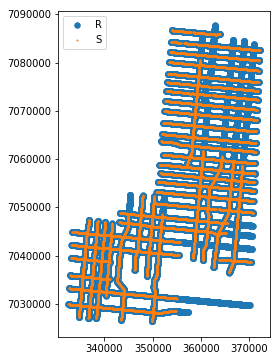

In [2]:
(Layouts()
 .add(*dfr[['x', 'y']].values.T, label='R', s=30)
 .add(*dfs[['x', 'y']].values.T, label='S', s=1)
 .show(figsize=(4, 6))
)

Запуск оптимизации положения бинов вдоль профилей

In [3]:
bin_size = 100

index_2d = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=bin_size, iters=100)

Визуализация распределения количества трасс внутри бинов вдоль профилей

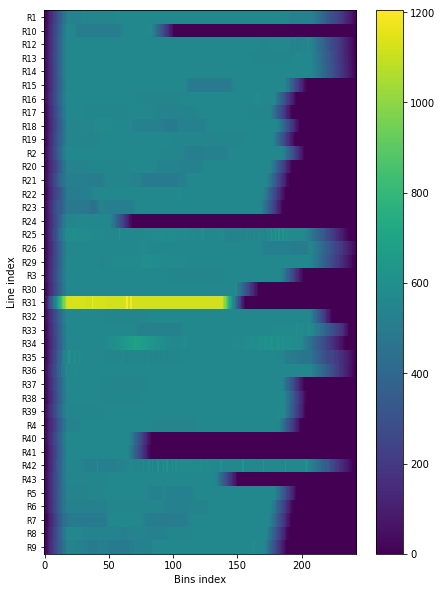

In [4]:
index_2d.show_heatmap(figsize=(7, 10))

### 3D сейсмика

Загрузка sps файлов

In [5]:
dfs = pd.read_csv("../../Xfield/Xfield_S.csv")
dfr = pd.read_csv("../../Xfield/Xfield_R.csv")
dfx = pd.read_csv("../../Xfield/Xfield_X.csv")

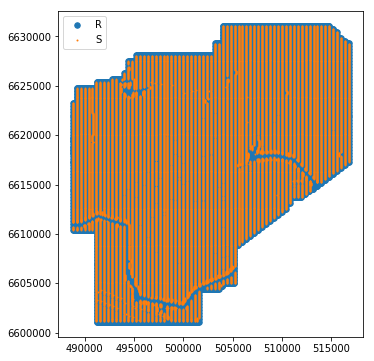

In [6]:
(Layouts()
 .add(*dfr[['x', 'y']].values.T, label='R', s=30)
 .add(*dfs[['x', 'y']].values.T, label='S', s=1)
 .show(figsize=(6, 6))
)

Запуск оптимизации положения бинов двумерной сетки

In [7]:
bin_size = 2000

index_3d = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=(bin_size, bin_size), iters=20)

Визуализация распределения количества трасс внутри бинов для двумерной сетки

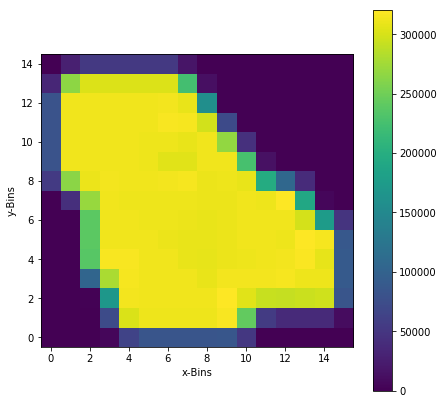

In [8]:
index_3d.show_heatmap(figsize=(7, 7))

## Критика

Предложенная модель сходится к локальным оптимальным положениям. Необходимо усовершенствовать модель, например, задавая случайное смещение на начальном шаге и выбирая лучшее решение по нескольким запускам.